In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

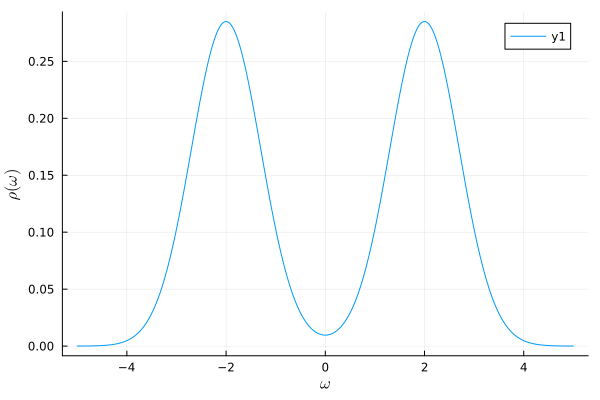

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.5*gaussian(omega, -2.0, 0.7) + 0.5*gaussian(omega, 2.0, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     2.204804e+00     5.321011e+00
 * time: 0.017506122589111328
     1     9.901103e-01     1.999587e+00
 * time: 1.2386860847473145
     2     8.450641e-01     1.536793e+00
 * time: 1.3956711292266846
     3     6.408355e-01     6.712314e-01
 * time: 1.530014991760254
     4     5.676085e-01     2.943207e-01
 * time: 1.747791051864624
     5     5.537021e-01     1.038418e-01
 * time: 1.8803191184997559
     6     5.513877e-01     4.656975e-02
 * time: 2.022675037384033
     7     5.509386e-01     2.319912e-02
 * time: 2.176953077316284
     8     5.508557e-01     7.993245e-03
 * time: 2.428295135498047
     9     5.508402e-01     3.538985e-03
 * time: 2.6209499835968018
    10     5.508372e-01     1.650627e-03
 * time: 2.786263942718506
    11     5.508366e-01     7.963850e-04
 * time: 3.0289840698242188
    12     5.508365e-01     3.020393e-04
 * time: 3.161195993423462
    13     5.508364e-01     1.469924e-04

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     5.508364e-01     9.399058e-09
 * time: 9.512901306152344e-5
max_theta=0.3791763971867817677985640574305829893761
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     5.508364e-01     1.572772e+00
 * time: 0.0002338886260986328
     1     2.370927e-01     4.987133e-01
 * time: 0.2576768398284912
     2     1.804656e-01     3.268556e-01
 * time: 0.4256019592285156
     3     1.414365e-01     8.239794e-02
 * time: 0.6537799835205078
     4     1.390516e-01     2.947395e-02
 * time: 0.8384678363800049
     5     1.384976e-01     1.763646e-02
 * time: 1.0046429634094238
     6     1.383737e-01     8.560788e-03
 * time: 1.1577389240264893
     7     1.383409e-01     4.329747e-03
 * time: 1.3021948337554932
     8     1.383337e-01     1.263351e-03
 * time: 1.5572929382324219
     9     1.383326e-01     5.250475e-04
 * time: 1.7118070125579834
    10     1.383325e-01     2.173843e-04
 * time: 1.888859987

     9     3.971082e-04     8.407367e-04
 * time: 3.2935631275177
    10     3.936189e-04     5.658612e-04
 * time: 3.6585841178894043
    11     3.924078e-04     3.937918e-04
 * time: 4.064358949661255
    12     3.922281e-04     1.243836e-04
 * time: 4.4469969272613525
    13     3.921584e-04     1.169202e-04
 * time: 4.8229241371154785
    14     3.919878e-04     1.818037e-04
 * time: 5.359604120254517
    15     3.913532e-04     4.709229e-04
 * time: 5.868020057678223
    16     3.861939e-04     9.826386e-04
 * time: 6.387874126434326
    17     3.835935e-04     3.117687e-04
 * time: 6.79365611076355
    18     3.833122e-04     4.057405e-05
 * time: 7.1674721240997314
    19     3.833092e-04     7.853819e-06
 * time: 7.43030309677124
    20     3.833090e-04     3.055594e-07
 * time: 7.7189249992370605
    21     3.833090e-04     3.853109e-08
 * time: 8.094202041625977
    22     3.833090e-04     9.488334e-09
 * time: 8.524481058120728
max_theta=0.50751730777639887857841404776129011

    32     7.555126e-05     3.185861e-05
 * time: 15.419718027114868
    33     7.554884e-05     8.128500e-06
 * time: 15.753185987472534
    34     7.554867e-05     2.692522e-06
 * time: 16.25444507598877
    35     7.554865e-05     1.085129e-06
 * time: 16.702669143676758
    36     7.554865e-05     3.645297e-07
 * time: 17.017884969711304
    37     7.554865e-05     1.454250e-07
 * time: 17.336163997650146
    38     7.554865e-05     6.266247e-08
 * time: 17.680299043655396
    39     7.554865e-05     2.505949e-08
 * time: 18.019021034240723
    40     7.554865e-05     8.352929e-09
 * time: 18.349061965942383
max_theta=0.5639129779695542393866618725249606128795
hardy optimization was success.
H=11
Iter     Function value   Gradient norm 
     0     7.554865e-05     1.572012e-03
 * time: 0.0002269744873046875
     1     7.500439e-05     7.784270e-04
 * time: 0.37499094009399414
     2     7.465030e-05     4.120727e-04
 * time: 0.7732689380645752
     3     7.424526e-05     3.074304e-

    51     6.527920e-05     3.482586e-05
 * time: 29.36991000175476
    52     6.527611e-05     5.017313e-05
 * time: 29.907299041748047
    53     6.527147e-05     6.314247e-05
 * time: 30.45811700820923
    54     6.526029e-05     8.383526e-05
 * time: 30.99431800842285
    55     6.524241e-05     9.198693e-05
 * time: 31.561007022857666
    56     6.520577e-05     5.406867e-05
 * time: 32.12219285964966
    57     6.519173e-05     2.315981e-05
 * time: 32.70330595970154
    58     6.519061e-05     3.682332e-06
 * time: 33.077905893325806
    59     6.519056e-05     1.406939e-06
 * time: 33.65641188621521
    60     6.519055e-05     7.914432e-07
 * time: 34.05419206619263
    61     6.519055e-05     2.508301e-07
 * time: 34.44041705131531
    62     6.519055e-05     1.171349e-07
 * time: 34.85082793235779
    63     6.519055e-05     6.251486e-08
 * time: 35.44876289367676
    64     6.519055e-05     2.297157e-08
 * time: 35.81736707687378
    65     6.519055e-05     9.743835e-09
 * t

    18     6.409606e-05     2.612410e-05
 * time: 10.377519130706787
    19     6.409115e-05     1.349466e-05
 * time: 11.01252293586731
    20     6.408996e-05     1.011304e-05
 * time: 11.658194065093994
    21     6.408868e-05     1.483483e-05
 * time: 12.294636964797974
    22     6.408740e-05     1.022249e-05
 * time: 12.929004907608032
    23     6.408683e-05     5.171053e-06
 * time: 13.574137926101685
    24     6.408662e-05     5.077215e-06
 * time: 14.208483934402466
    25     6.408640e-05     3.592106e-06
 * time: 14.834640979766846
    26     6.408631e-05     3.172628e-06
 * time: 15.470063924789429
    27     6.408611e-05     4.056629e-06
 * time: 16.32719612121582
    28     6.408596e-05     3.438242e-06
 * time: 17.134701013565063
    29     6.408569e-05     8.266213e-06
 * time: 18.351691007614136
    30     6.408546e-05     8.487827e-06
 * time: 19.536967992782593
    31     6.408482e-05     1.161010e-05
 * time: 20.626259088516235
    32     6.408010e-05     3.928654

    42     6.382139e-05     8.395803e-06
 * time: 28.917257070541382
    43     6.382118e-05     1.081542e-05
 * time: 29.626662969589233
    44     6.382077e-05     1.458839e-05
 * time: 30.31103205680847
    45     6.381998e-05     1.984636e-05
 * time: 31.00897789001465
    46     6.381859e-05     2.630470e-05
 * time: 31.714608907699585
    47     6.381655e-05     3.191672e-05
 * time: 32.41165208816528
    48     6.381420e-05     3.459079e-05
 * time: 33.106926918029785
    49     6.381126e-05     3.233841e-05
 * time: 33.81682586669922
    50     6.380583e-05     1.654415e-05
 * time: 34.51312208175659
    51     6.380497e-05     9.134664e-06
 * time: 34.98508095741272
    52     6.380437e-05     3.463893e-06
 * time: 35.457704067230225
    53     6.380424e-05     2.167394e-06
 * time: 36.16181302070618
    54     6.380420e-05     1.270719e-06
 * time: 36.874881982803345
    55     6.380419e-05     1.239601e-06
 * time: 37.571698904037476
    56     6.380411e-05     3.350093e-06


    39     6.372927e-05     1.482298e-06
 * time: 27.718361139297485
    40     6.372927e-05     4.646890e-07
 * time: 28.442880153656006
    41     6.372926e-05     4.258390e-07
 * time: 29.163888216018677
    42     6.372926e-05     1.766133e-07
 * time: 29.64243721961975
    43     6.372926e-05     2.425836e-07
 * time: 30.486051082611084
    44     6.372926e-05     3.828961e-07
 * time: 31.329670190811157
    45     6.372926e-05     5.365741e-07
 * time: 32.36225700378418
    46     6.372926e-05     7.166527e-07
 * time: 32.95483613014221
    47     6.372926e-05     9.768623e-07
 * time: 33.74679207801819
    48     6.372926e-05     1.225527e-06
 * time: 34.24744415283203
    49     6.372925e-05     1.584555e-06
 * time: 35.07548904418945
    50     6.372925e-05     1.904690e-06
 * time: 35.55988812446594
    51     6.372924e-05     2.392414e-06
 * time: 36.36864900588989
    52     6.372924e-05     2.855101e-06
 * time: 36.93466305732727
    53     6.372922e-05     3.515614e-06
 *

    46     6.370240e-05     1.784433e-06
 * time: 31.45761203765869
    47     6.370238e-05     1.034862e-06
 * time: 32.188244104385376
    48     6.370237e-05     1.731216e-06
 * time: 32.93257212638855
    49     6.370235e-05     1.747235e-06
 * time: 33.69144296646118
    50     6.370234e-05     2.339357e-06
 * time: 34.4245240688324
    51     6.370232e-05     2.594410e-06
 * time: 35.17791795730591
    52     6.370230e-05     3.066000e-06
 * time: 35.89535212516785
    53     6.370227e-05     2.806105e-06
 * time: 36.613882064819336
    54     6.370222e-05     1.179690e-06
 * time: 37.3290319442749
    55     6.370221e-05     9.286339e-07
 * time: 37.8107271194458
    56     6.370221e-05     3.226481e-07
 * time: 38.31450700759888
    57     6.370221e-05     2.847004e-07
 * time: 38.801141023635864
    58     6.370221e-05     5.296143e-07
 * time: 39.51934313774109
    59     6.370220e-05     5.335810e-07
 * time: 39.999655961990356
    60     6.370220e-05     8.335577e-07
 * tim

    32     6.369398e-05     1.400803e-06
 * time: 24.585206985473633
    33     6.369394e-05     2.611874e-06
 * time: 25.380340814590454
    34     6.369386e-05     1.802770e-06
 * time: 26.19440484046936
    35     6.369383e-05     1.738478e-06
 * time: 27.003073930740356
    36     6.369378e-05     1.295583e-06
 * time: 28.033528804779053
    37     6.369376e-05     1.284846e-06
 * time: 28.81132698059082
    38     6.369376e-05     1.079307e-06
 * time: 29.60367202758789
    39     6.369374e-05     9.284005e-07
 * time: 30.383485794067383
    40     6.369372e-05     7.541463e-07
 * time: 31.140082836151123
    41     6.369372e-05     6.368109e-07
 * time: 31.925076961517334
    42     6.369371e-05     8.428273e-07
 * time: 32.70095086097717
    43     6.369371e-05     7.100689e-07
 * time: 33.47598600387573
    44     6.369370e-05     1.127699e-06
 * time: 33.975658893585205
    45     6.369370e-05     9.722230e-07
 * time: 34.5130980014801
    46     6.369369e-05     1.689917e-06


   153     6.368604e-05     6.477782e-06
 * time: 108.05450701713562
   154     6.368602e-05     6.768513e-06
 * time: 108.60066390037537
   155     6.368598e-05     8.048718e-06
 * time: 109.36107301712036
   156     6.368595e-05     8.398669e-06
 * time: 109.87462782859802
   157     6.368589e-05     9.941667e-06
 * time: 110.63557982444763
   158     6.368584e-05     1.035596e-05
 * time: 111.15224981307983
   159     6.368575e-05     1.217951e-05
 * time: 111.9128909111023
   160     6.368566e-05     1.265598e-05
 * time: 112.44258689880371
   161     6.368552e-05     1.472851e-05
 * time: 113.17178201675415
   162     6.368539e-05     1.524204e-05
 * time: 113.69339179992676
   163     6.368515e-05     1.735695e-05
 * time: 114.47328782081604
   164     6.368493e-05     1.777529e-05
 * time: 114.97423791885376
   165     6.368443e-05     1.879599e-05
 * time: 115.72058486938477
   166     6.368374e-05     1.723672e-05
 * time: 116.47272181510925
   167     6.368155e-05     9.54261

   273     6.363454e-05     2.939843e-08
 * time: 189.5371057987213
   274     6.363454e-05     2.214382e-08
 * time: 190.21426701545715
   275     6.363454e-05     1.279902e-08
 * time: 190.89131593704224
   276     6.363454e-05     9.771659e-09
 * time: 191.48972296714783
max_theta=0.6292451363703596743411572115227456794496
hardy optimization was success.
H=19
Iter     Function value   Gradient norm 
     0     6.363454e-05     9.399389e-05
 * time: 0.0002582073211669922
     1     6.363374e-05     4.886973e-05
 * time: 0.691655158996582
     2     6.363335e-05     2.110503e-05
 * time: 1.451801061630249
     3     6.363304e-05     1.544416e-05
 * time: 2.283994197845459
     4     6.363274e-05     1.462306e-05
 * time: 2.9339890480041504
     5     6.363256e-05     1.513759e-05
 * time: 3.4751110076904297
     6     6.363239e-05     9.669700e-06
 * time: 4.023174047470093
     7     6.363208e-05     8.346035e-06
 * time: 4.579096078872681
     8     6.363181e-05     1.323414e-05
 * 

   115     6.361802e-05     1.314534e-06
 * time: 87.43709707260132
   116     6.361802e-05     1.382206e-06
 * time: 87.98103618621826
   117     6.361802e-05     1.598543e-06
 * time: 88.80227303504944
   118     6.361802e-05     1.679751e-06
 * time: 89.3286190032959
   119     6.361802e-05     1.935598e-06
 * time: 90.13145303726196
   120     6.361801e-05     2.031755e-06
 * time: 90.7590081691742
   121     6.361801e-05     2.334272e-06
 * time: 91.57677721977234
   122     6.361801e-05     2.448959e-06
 * time: 92.11415600776672
   123     6.361801e-05     2.807063e-06
 * time: 92.92295217514038
   124     6.361800e-05     2.944616e-06
 * time: 93.44938707351685
   125     6.361800e-05     3.368813e-06
 * time: 94.26833510398865
   126     6.361799e-05     3.533011e-06
 * time: 94.78003120422363
   127     6.361798e-05     4.035771e-06
 * time: 95.60328102111816
   128     6.361798e-05     4.230883e-06
 * time: 96.15346312522888
   129     6.361797e-05     4.827464e-06
 * time: 

     3     6.358625e-05     4.200917e-05
 * time: 1.799105167388916
     4     6.358253e-05     5.172741e-05
 * time: 2.4460670948028564
     5     6.357917e-05     7.827638e-05
 * time: 3.028534173965454
     6     6.357578e-05     4.886750e-05
 * time: 3.6290831565856934
     7     6.356837e-05     4.293390e-05
 * time: 4.265052080154419
     8     6.356151e-05     5.720395e-05
 * time: 4.815723180770874
     9     6.355847e-05     3.652439e-05
 * time: 5.3882081508636475
    10     6.355377e-05     2.767291e-05
 * time: 5.939067125320435
    11     6.354888e-05     3.113296e-05
 * time: 6.828900098800659
    12     6.354634e-05     3.289051e-05
 * time: 7.485374212265015
    13     6.354168e-05     3.228325e-05
 * time: 8.123847007751465
    14     6.353772e-05     3.818996e-05
 * time: 8.735742092132568
    15     6.353151e-05     3.360008e-05
 * time: 9.54820704460144
    16     6.352515e-05     3.693317e-05
 * time: 10.405357122421265
    17     6.351928e-05     4.064357e-05
 * t

   124     6.336959e-05     2.596768e-06
 * time: 92.9154782295227
   125     6.336957e-05     1.794579e-06
 * time: 93.47239017486572
   126     6.336955e-05     1.509647e-06
 * time: 94.01504516601562
   127     6.336955e-05     9.624006e-07
 * time: 94.58808016777039
   128     6.336954e-05     6.971482e-07
 * time: 95.17089104652405
   129     6.336954e-05     4.669248e-07
 * time: 95.73153614997864
   130     6.336954e-05     3.967914e-07
 * time: 96.29360818862915
   131     6.336954e-05     2.623936e-07
 * time: 96.84359502792358
   132     6.336954e-05     3.079597e-07
 * time: 97.38742709159851
   133     6.336954e-05     3.172266e-07
 * time: 97.97377610206604
   134     6.336954e-05     4.291965e-07
 * time: 98.52462816238403
   135     6.336954e-05     4.641446e-07
 * time: 99.13884401321411
   136     6.336953e-05     5.860016e-07
 * time: 99.93894720077515
   137     6.336953e-05     6.375676e-07
 * time: 100.50747513771057
   138     6.336953e-05     7.754765e-07
 * time

   244     6.331046e-05     2.598177e-05
 * time: 177.98310899734497
   245     6.331003e-05     2.530896e-05
 * time: 178.54254412651062
   246     6.330875e-05     3.515240e-05
 * time: 179.3662931919098
   247     6.330799e-05     3.413117e-05
 * time: 179.96107506752014
   248     6.330568e-05     4.593412e-05
 * time: 180.83771514892578
   249     6.330433e-05     4.528793e-05
 * time: 181.4142861366272
   250     6.330021e-05     6.262767e-05
 * time: 182.27882504463196
   251     6.329777e-05     6.235782e-05
 * time: 182.84084606170654
   252     6.329045e-05     7.255536e-05
 * time: 183.69868803024292
   253     6.328569e-05     7.608327e-05
 * time: 184.26718521118164
   254     6.327176e-05     9.394715e-05
 * time: 185.1220531463623
   255     6.325552e-05     9.831118e-05
 * time: 185.977126121521
   256     6.320189e-05     9.156076e-05
 * time: 186.80332803726196
   257     6.318096e-05     8.042126e-05
 * time: 187.43503403663635
   258     6.316489e-05     3.980499e-0

   364     6.315472e-05     4.963707e-06
 * time: 253.811115026474
   365     6.315472e-05     5.256246e-06
 * time: 254.44415402412415
   366     6.315471e-05     5.545676e-06
 * time: 255.03508710861206
   367     6.315470e-05     5.872515e-06
 * time: 255.69278502464294
   368     6.315469e-05     6.195924e-06
 * time: 256.40362215042114
   369     6.315468e-05     6.561189e-06
 * time: 257.13907408714294
   370     6.315467e-05     6.922672e-06
 * time: 257.704656124115
   371     6.315465e-05     7.331017e-06
 * time: 258.2842810153961
   372     6.315464e-05     7.735192e-06
 * time: 258.88054513931274
   373     6.315462e-05     8.191868e-06
 * time: 259.458909034729
   374     6.315460e-05     8.643946e-06
 * time: 260.1618740558624
   375     6.315458e-05     9.154892e-06
 * time: 260.7286310195923
   376     6.315456e-05     9.660769e-06
 * time: 261.34117007255554
   377     6.315453e-05     1.023271e-05
 * time: 261.9528341293335
   378     6.315450e-05     1.079906e-05
 * 

In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31


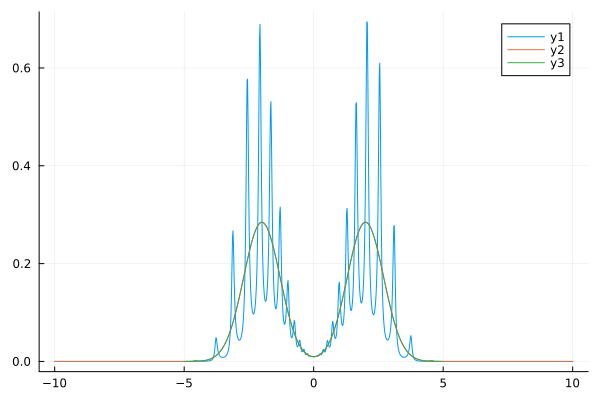

In [10]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

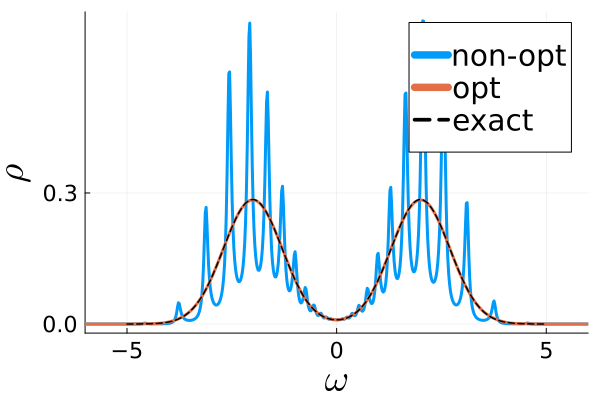

In [11]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")